In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model

In [ ]:
!pip install d2l==0.17.0


In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[5]

'dog'

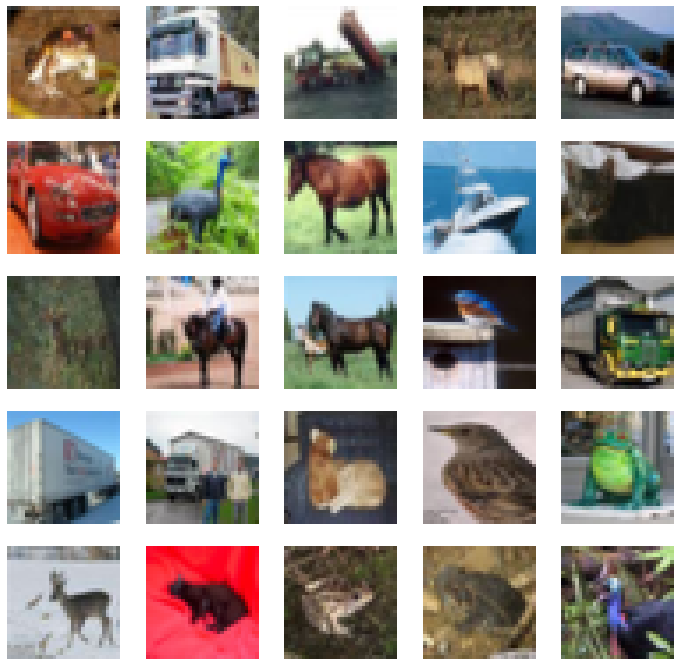

In [ ]:
plt.figure(figsize= (12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#Model 1

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

def net():
    return tf.keras.models.Sequential([
        # Here, we use a larger 11 x 11 window to capture objects. At the same
        # time, we use a stride of 4 to greatly reduce the height and width of
        # the output. Here, the number of output channels is much larger than
        # that in LeNet
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # Make the convolution window smaller, set padding to 2 for consistent
        # height and width across the input and output, and increase the
        # number of output channels
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # Use three successive convolutional layers and a smaller convolution
        # window. Except for the final convolutional layer, the number of
        # output channels is further increased. Pooling layers are not used to
        # reduce the height and width of input after the first two
        # convolutional layers
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        # Here, the number of outputs of the fully-connected layer is several
        # times larger than that in LeNet. Use the dropout layer to mitigate
        # overfitting
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # Output layer. Since we are using Fashion-MNIST, the number of
        # classes is 10, instead of 1000 as in the paper
        tf.keras.layers.Dense(10)])

In [ ]:
X = tf.random.uniform((1, 224, 224, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2D output shape:	 (1, 54, 54, 96)
MaxPooling2D output shape:	 (1, 26, 26, 96)
Conv2D output shape:	 (1, 26, 26, 256)
MaxPooling2D output shape:	 (1, 12, 12, 256)
Conv2D output shape:	 (1, 12, 12, 384)
Conv2D output shape:	 (1, 12, 12, 384)
Conv2D output shape:	 (1, 12, 12, 256)
MaxPooling2D output shape:	 (1, 5, 5, 256)
Flatten output shape:	 (1, 6400)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 10)


In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, X_train, X_test, num_epochs, lr, d2l.try_gpu())

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image

In [ ]:
model_cnn = models.Sequential([
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.5),
    
        layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [ ]:
model_cnn.compile(
                loss = 'sparse_categorical_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])


MODEL_2=model_cnn.fit(X_train,y_train,
                        epochs=20,
                      verbose=1)

Epoch 1/20
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6350 - accuracy: 0.3932
Epoch 2/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.3515 - accuracy: 0.5120
Epoch 3/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2445 - accuracy: 0.5546
Epoch 4/20
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1806 - accuracy: 0.5783
Epoch 5/20
 293/1563 [====>.........................] - ETA: 1:01 - loss: 1.1411 - accuracy: 0.5930

KeyboardInterrupt: ignored

#Model 2

In [ ]:
import torch.nn as nn


class AlexNet(nn.Module):

    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.6),
            nn.Linear(4096, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.6),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )

    def forward(self, x):
        conv_features = self.features(x)
        flatten = conv_features.view(conv_features.size(0), -1)
        fc = self.fc_layers(flatten)
        return fc

In [ ]:
import torch
import torchvision
from torchvision import transforms as transforms

transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_classes = ('plane', 'car', 'bird', 'cat',
                   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def cifar10_loader(train=True, batch_size=128):
    set = torchvision.datasets.CIFAR10(root='~/data', train=train,
                                       download=True, transform=transform)
    loader = torch.utils.data.DataLoader(set, batch_size=batch_size,
                                         shuffle=True, num_workers=4)
    return loader

def config_matplotlib():
    import matplotlib
    params = {
        'axes.labelsize': 12,
        'legend.fontsize': 10,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'text.usetex': False,
    }
    matplotlib.rcParams.update(params)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import time

import torch
import torch.nn as nn
import torch.optim as optim
from tensorboardX import SummaryWriter

trainloader = cifar10_loader(train=True)
testloader = cifar10_loader(train=False)
writer = SummaryWriter("./logs")

epochs = 100
batch_size = 128
log_batch = 200
train_metrics = []
test_metrics = []

net = AlexNet()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


def train():
    for epoch in range(epochs):
        running_loss = 0.0
        correct_classified = 0
        total = 0
        start_time = time.time()
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct_classified += (predicted == labels).sum().item()
            running_loss += loss.item()
            if i % log_batch == log_batch - 1:
                avg_loss = running_loss / log_batch
                print('Epoch: %d/%d Batch: %5d loss: %.3f' % (epoch + 1, epochs, i + 1, avg_loss))
                writer.add_scalar('data/train_loss', avg_loss, epoch * len(trainloader) * batch_size + i)
                running_loss = 0.0
        print("Time/epoch: {} sec".format(time.time() - start_time))
        train_acc = (100 * correct_classified / total)
        train_metrics.append(train_acc)
        print('Train accuracy of the network images: %d %%' % train_acc)
        writer.add_scalar('data/train_acc', train_acc, epoch)
        torch.save(net.state_dict(), "model.h5")
        correct_classified = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                inputs, labels = images.to(device), labels.to(device)
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct_classified += (predicted == labels).sum().item()
            test_acc = (100 * correct_classified / total)
            test_metrics.append(test_acc)
            print('Test accuracy of the network: %d %%' % test_acc)
            writer.add_scalar('data/test_acc', test_acc, epoch)


if __name__ == '__main__':
    train()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar-10-python.tar.gz to /root/data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified
Epoch: 1/100 Batch:   200 loss: 1.879
Time/epoch: 1288.733999490738 sec
Train accuracy of the network images: 34 %
Test accuracy of the network: 48 %
Epoch: 2/100 Batch:   200 loss: 1.359
Time/epoch: 1313.861755847931 sec
Train accuracy of the network images: 52 %
Test accuracy of the network: 55 %
Epoch: 3/100 Batch:   200 loss: 1.135
Time/epoch: 1340.8591029644012 sec
Train accuracy of the network images: 60 %
Test accuracy of the network: 62 %
Epoch: 4/100 Batch:   200 loss: 0.977
Time/epoch: 1337.0967140197754 sec
Train accuracy of the network images: 65 %
Test accuracy of the network: 68 %
Epoch: 5/100 Batch:   200 loss: 0.879
Time/epoch: 1356.3553051948547 sec
Train accuracy of the network images: 69 %
Test accuracy of the network: 69 %
Epoch: 6/100 Batch:   200 loss: 0.812
Time/epoch: 1384.0653347969055 sec
Train accuracy of the network images: 71 %
Test accuracy of the network: 70 %
Epoch: 7/100 Batch:   200 loss: 0.752
Time/epoch: 1369.810